In [ ]:
Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simple_colors import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

In [ ]:
Reading the data and understanding the insights through info and describe function

In [3]:
customer=pd.read_excel(r'C:\Users\user\Desktop\Customer Segmentation project\cust_data.xlsx')


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
customer_copy = customer.copy()
#customer_copy1 = customer
customer_copy.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
#customer_copy.info()
customer_copy.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
customer.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
customer_copy['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
As we have observed that Gender column has 2724 null values we are replacing those with unknown for further model building 

In [9]:
customer_copy['Gender']=customer_copy['Gender'].fillna('unknown')

In [10]:
customer_copy.Gender.value_counts()

Gender
F          22054
M           5222
unknown     2724
Name: count, dtype: int64

In [ ]:
#NUMBER OF CUSTOMERS
#To see the Gender percentage who made dominatation of Online Purchasing


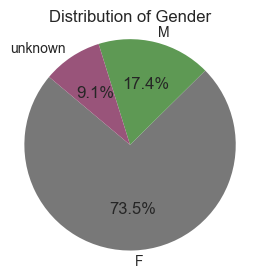

In [11]:
gender_counts=customer_copy.Gender.value_counts()
Gender=['F', 'M', 'unknown']


#labels = ['Category A', 'Category B', 'Category C']
#percentages = [35, 40, 25]
percentage = gender_counts * 100 / len(customer.Gender)
# Create a pie chart
plt.figure(figsize=(3,3))  # Optional: Set the figure size
plt.pie(percentage, labels= Gender , autopct='%1.1f%%', startangle=140, colors=['#787878','#5E9954','#99547A'])

# Customize the chart
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.show()

In [12]:
new_m= customer_copy.loc[(customer['Gender'] == 'M')]
max_m=new_m['Orders'].value_counts().sort_index(ascending=True)
no_order=max_m.iloc[0]
avg_order=int(max_m.mean())
max_order=max_m.iloc[-1]

order_male=no_order,avg_order,max_order
order_male


(1204, 401, 84)

In [13]:
new_f = customer_copy.loc[(customer['Gender']=='F')]
max_f=new_f['Orders'].value_counts().sort_index(ascending=True)
no_order0=max_f.iloc[0]
avg_order0=int(max_f.mean())
max_order0=max_f.iloc[-1]

order_female=no_order0,avg_order0,max_order0
order_female

(5090, 1696, 351)

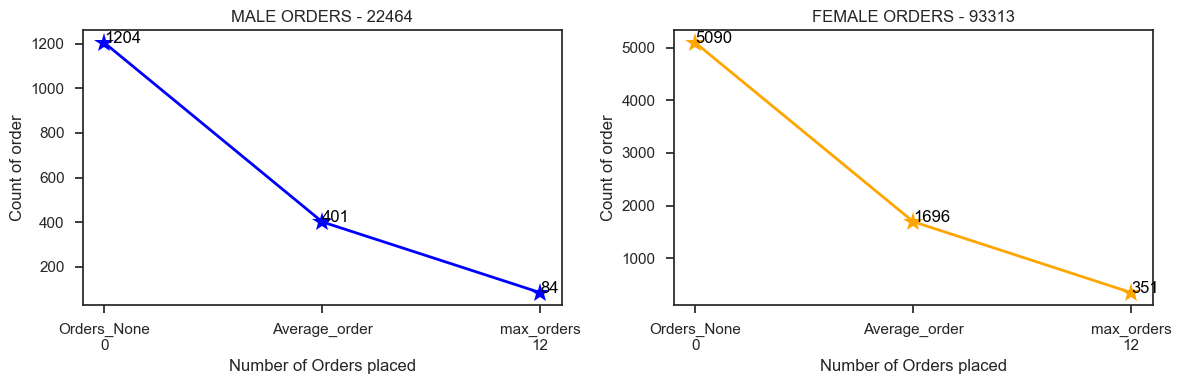


TOTAL NUMBER OF ORDERS PLACED BY CUSTOMERS :


Female Order  : 93313

Male Order    : 22464

Unknown Order : 0

Total Order   : 115777

UNKNOWN ORDERS :  0 we have to looking deep into unknown orders will increase the product recommendation wise


In [16]:
#==============number of orders placed by male and female=================================================================

new_m= customer_copy.loc[(customer_copy['Gender'] == 'M')]    #male
max_m=new_m['Orders'].sum()
new_f= customer_copy.loc[(customer_copy['Gender'] == 'F')]    #female
max_f=new_f['Orders'].sum()
new_u= customer_copy.loc[(customer_copy['Gender'] == 'Unknown')] #unknown
max_u=new_u['Orders'].sum()

sns.set(style="ticks") 
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot 1 - Male customer
axes[0].plot(['Orders_None\n0', 'Average_order', 'max_orders\n12'], order_male, marker='*', linewidth=2, markersize=15, color='blue')
axes[0].set_title(f'MALE ORDERS - {max_m}')
axes[0].set_xlabel('Number of Orders placed')
axes[0].set_ylabel('Count of order')
for i, count in enumerate(order_male):
    axes[0].text(i, count, str(count), va='baseline', color='black')

# Plot 2 -Female Customer
axes[1].plot(['Orders_None\n0', 'Average_order', 'max_orders\n12'], order_female, marker='*', linewidth=2, markersize=15, color='orange')
axes[1].set_title(f'FEMALE ORDERS - {max_f}')
axes[1].set_xlabel('Number of Orders placed')
axes[1].set_ylabel('Count of order')
for i, count in enumerate(order_female):
    axes[1].text(i, count, str(count), va='baseline', color='black')
plt.tight_layout()  # auto adjust between subplots
plt.show() 

print('\nTOTAL NUMBER OF ORDERS PLACED BY CUSTOMERS :')
print('\n\nFemale Order  :',max_f)
print('\nMale Order    :',max_m)
print('\nUnknown Order :',max_u)
print('\nTotal Order   :',(max_f+max_m+max_u))
print('\nUNKNOWN ORDERS : ',max_u,"we have to looking deep into unknown orders will increase the product recommendation wise")

In [17]:
#TOP ORDER PLACED BY CUSTOMER ID NUMBER
top_cust=customer_copy.copy()
top_cust['order_count']= top_cust.iloc[:,3:].sum(axis=1)
top_cust_id=top_cust.sort_values('order_count',ascending=False).head(10)
top_cust_id

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,order_count
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
24337,24338,M,11,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,96
29583,29584,F,11,6,3,1,0,2,1,0,...,2,1,3,0,0,3,0,2,1,87
29131,29132,F,1,1,2,1,0,2,0,1,...,1,6,2,2,2,3,1,1,4,85
10658,10659,F,0,0,0,0,0,1,0,0,...,1,0,0,0,0,7,5,1,0,83
20024,20025,F,0,0,1,0,12,0,0,2,...,2,1,2,0,0,4,0,0,1,83


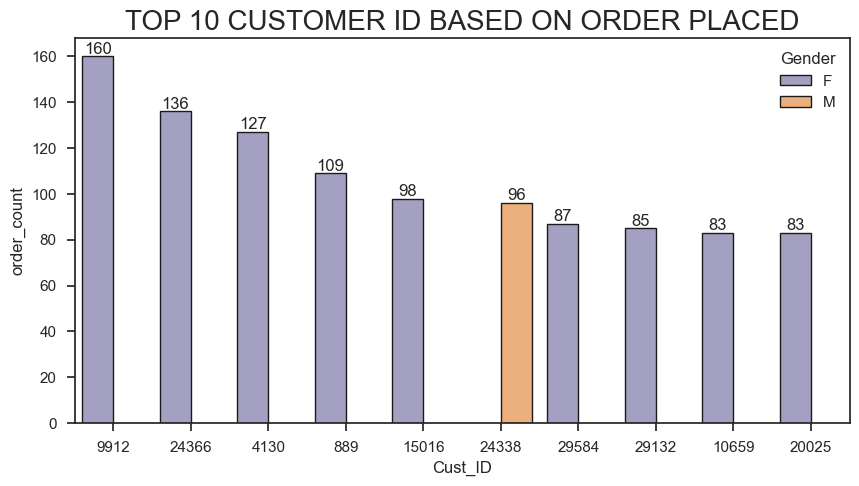

In [18]:
plt.figure(figsize=(10,5))
plt.title("TOP 10 CUSTOMER ID BASED ON ORDER PLACED",fontsize=20)
axes=sns.barplot(x='Cust_ID',
            y="order_count", data=top_cust_id,
            hue='Gender',linewidth=1,edgecolor=".1",palette='tab20c_r',
            order=top_cust_id.sort_values('order_count',ascending = False).Cust_ID)
for i in axes.containers:
    axes.bar_label(i)




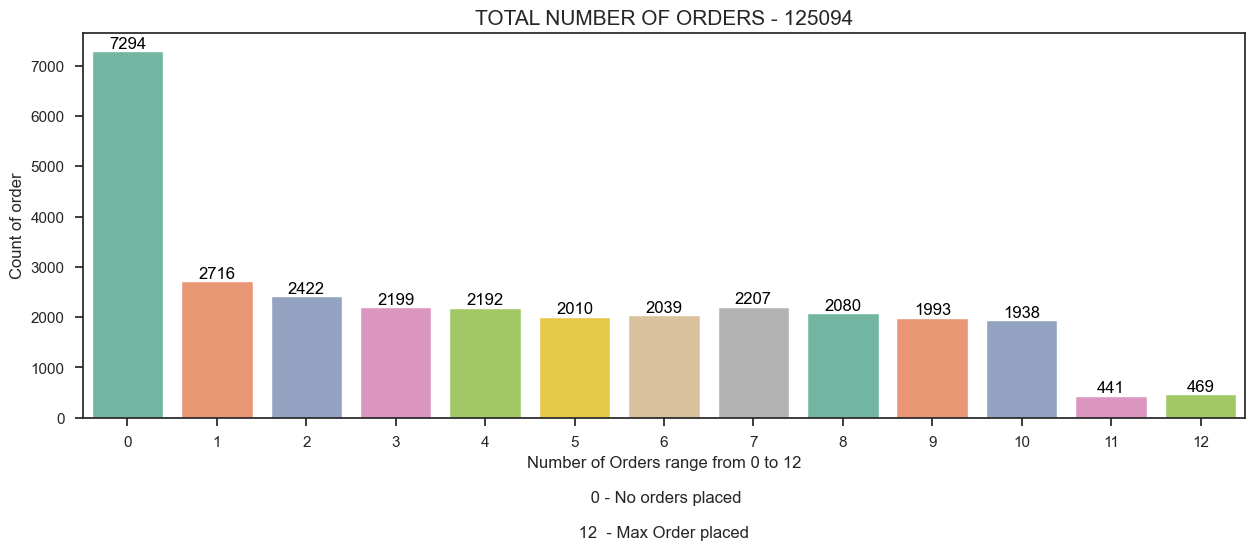

In [19]:
total_o=customer['Orders'].sum()

plt.figure(figsize=(15,5))
sns.countplot(x=customer['Orders'],palette = "Set2",)
plt.title(f'TOTAL NUMBER OF ORDERS - {total_o}',fontsize=15)
plt.xlabel('Number of Orders range from 0 to 12\n\n 0 - No orders placed\n\n 12  - Max Order placed ')
plt.ylabel('Count of order')

o_count=customer_copy.Orders.value_counts().sort_index(ascending=True)
for i, count in enumerate(o_count):
    plt.text(i, count, str(count), va='bottom',ha='center', color='black')
plt.show()


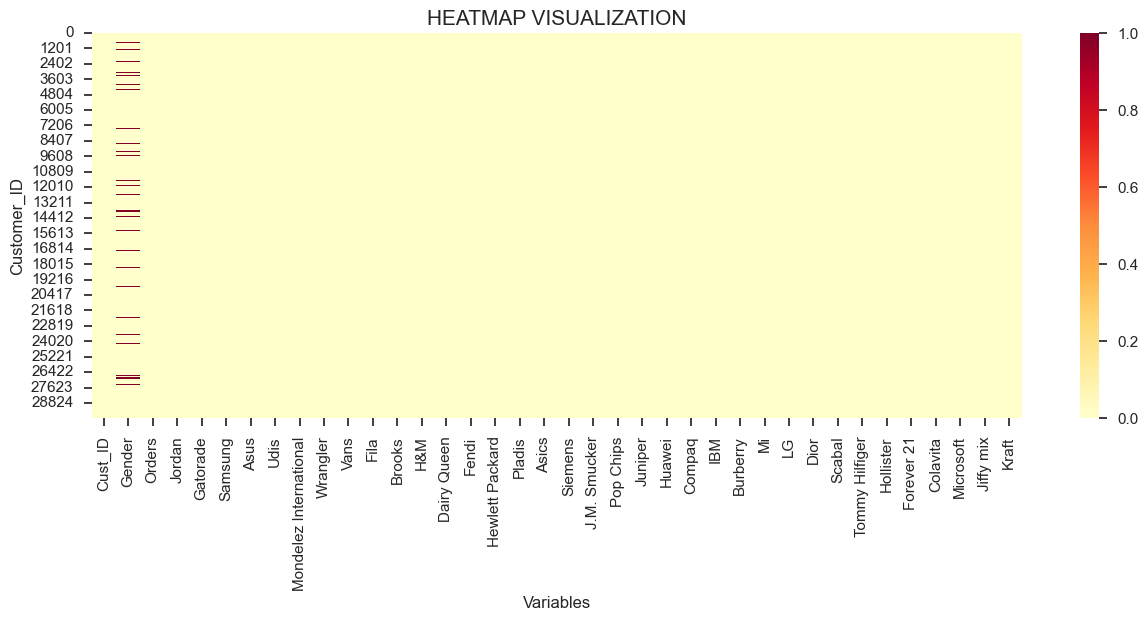

In [20]:
#DATA PREPROCESSING
#HANDLING MISSING VALUES
#missing=customer.copy()
#Creating Heatmap for visualize the missing values

plt.figure(figsize=(15,5))
sns.heatmap(data=customer.isnull(),cmap='YlOrRd')
plt.title('HEATMAP VISUALIZATION', fontsize = 15)
plt.xlabel('Variables')
plt.ylabel('Customer_ID')
plt.show()


In [21]:
customer.isna().sum().sum()

2724

In [23]:
customer_copy1=customer.copy()

In [24]:
customer_copy1.isna().sum().sum()

2724

In [25]:
customer_copy1= pd.get_dummies(customer_copy1,columns=['Gender'])    
data=customer_copy1.set_index('Cust_ID')

In [26]:
data.isna().sum().sum()
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,False,True
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,False,True
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,False
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,False,False


In [27]:
#DATA CLEANING

feature_select=data.drop(columns=['Gender_M','Gender_F'],axis=1)


In [29]:
#STATISTICAL SUMMARY
feature_select.describe(exclude=object,percentiles=[.75,.90])

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


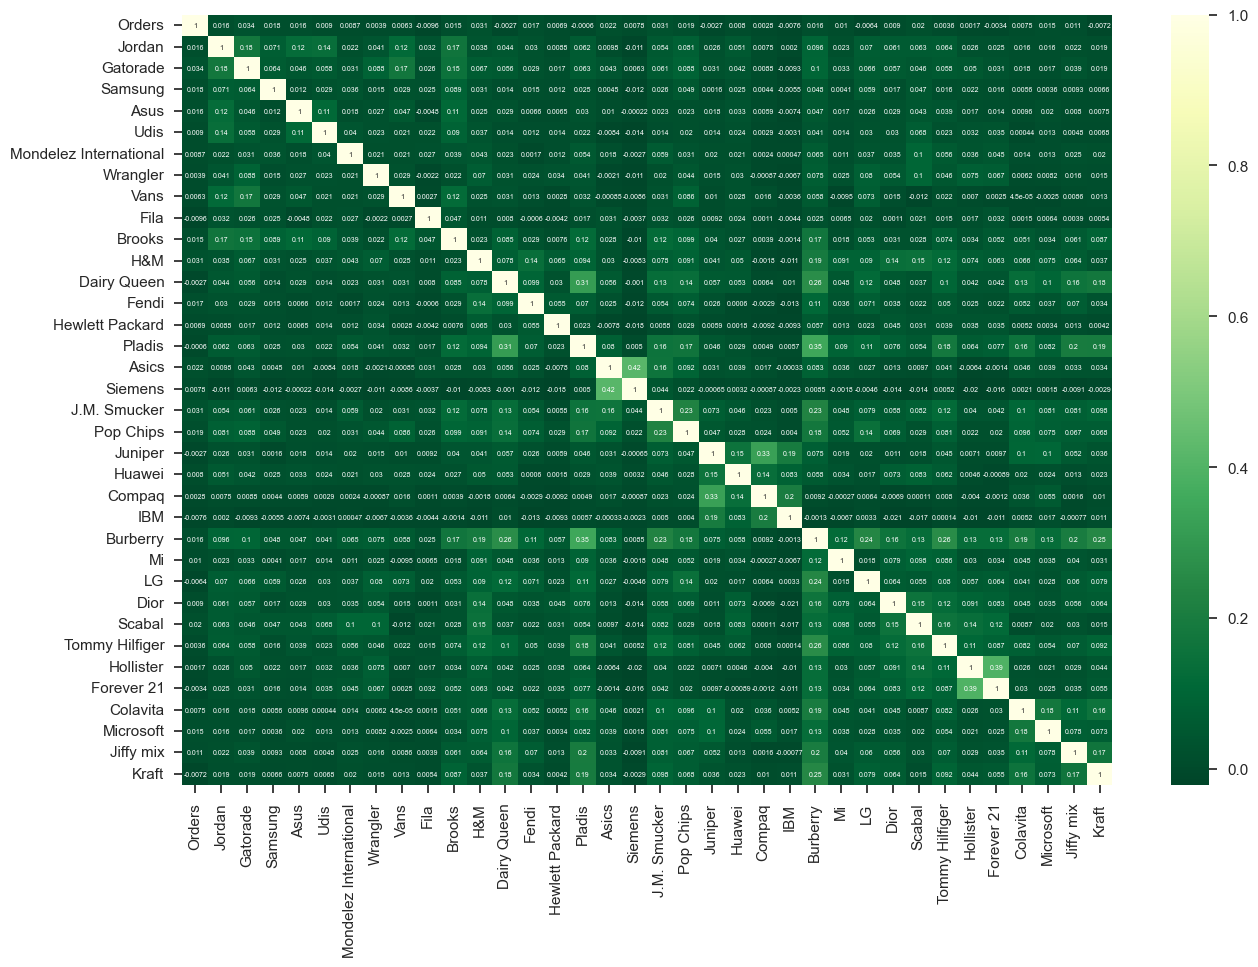

In [30]:
#CORRELATION BETWEEN THE VARIABLES
plt.figure(figsize=(15, 10))
corr_=sns.heatmap(feature_select.corr(), cmap="YlGn_r", annot=True,annot_kws={'size':5})
#plt.show()

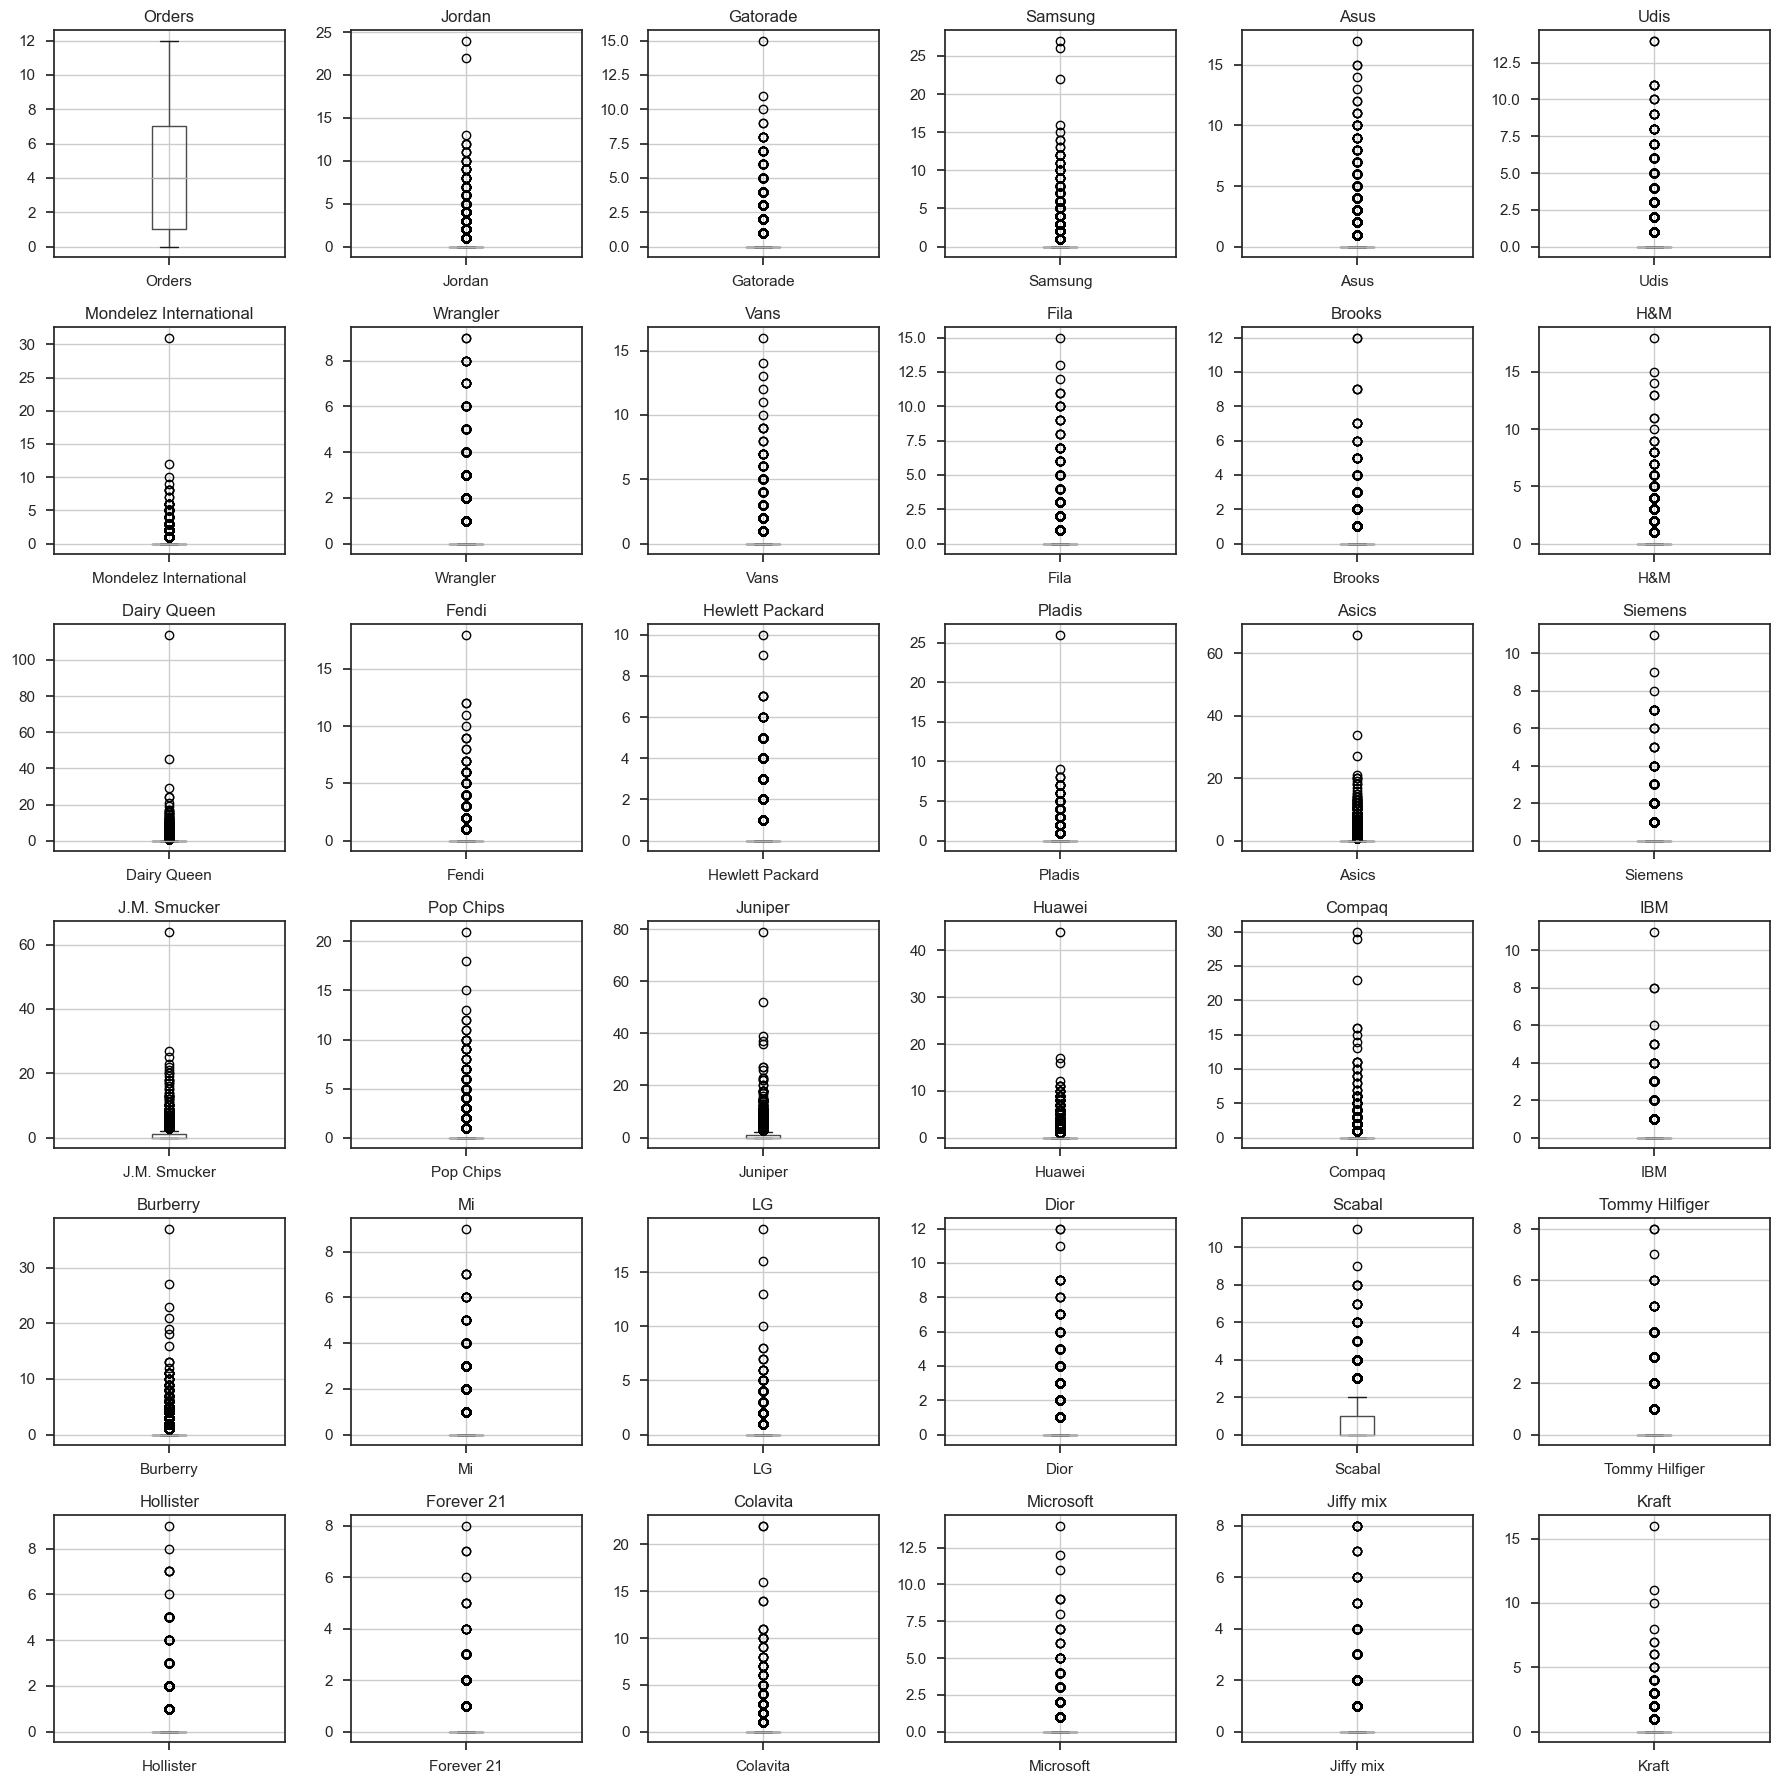

In [31]:
#FEATURE SELECTION
#FINDING OUT THE OUTLIERS USING BOXPLOT
columns_to_plot = feature_select.columns[:36]

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 6, i % 6]  # Get the appropriate axis for the subplot
    feature_select.boxplot(column=column, ax=ax)  
    ax.set_title(column)  
plt.tight_layout() 
plt.show()

In [32]:
#TO FIND PURCHASE PATTERN USE BRAND SEARCH ANALYSIS
brand_analysis=data.iloc[:,1:36]
brand_analysis.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Silhoutte score


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For Optimal number 2, the average silhouette score is 0.4258849257911055


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For Optimal number 3, the average silhouette score is 0.41446568424862734


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For Optimal number 4, the average silhouette score is 0.36609115227038336


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For Optimal number 5, the average silhouette score is 0.19732817185206597

Optimal number of clusters(k) : 2 with highest silhoutte score


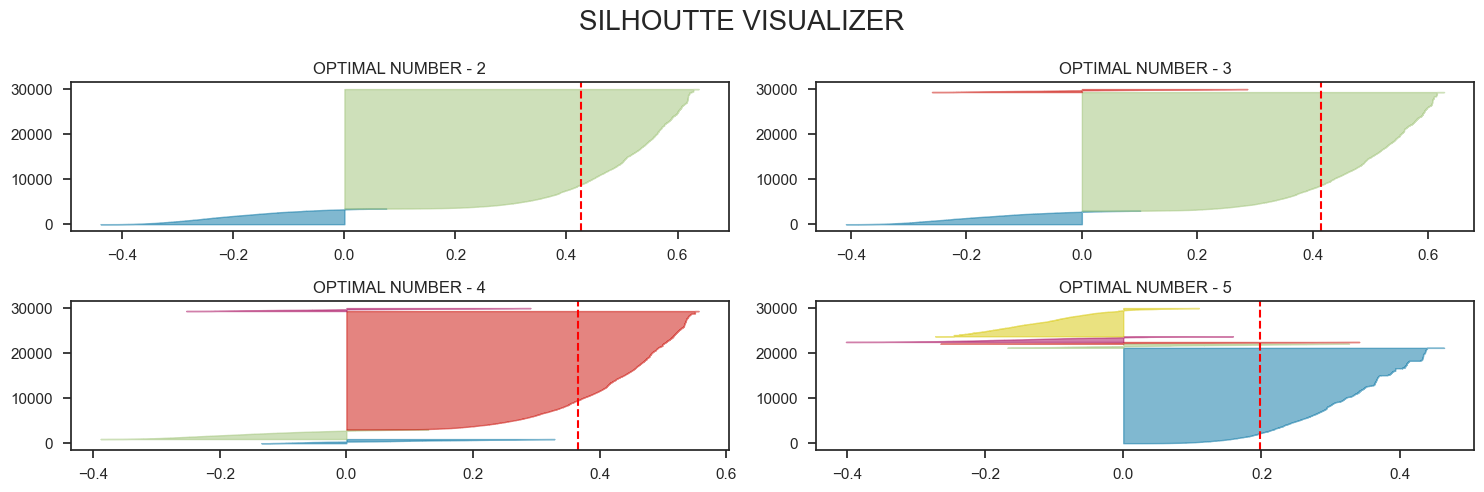

In [33]:
#kmeans = KMeans(n_clusters=3, n_init=10)
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
silhouette_scores = []
random_k = [2,3,4, 5]
print('Silhoutte score')
for i in random_k:
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=50)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(brand_analysis)
    
    cluster_labels = kmeans.fit_predict(brand_analysis)
    score = silhouette_score(brand_analysis, cluster_labels,random_state=50)
    silhouette_scores.append(score)
    print(f'For Optimal number {i}, the average silhouette score is {score}')
    ax[q-1][mod].set_title(f'OPTIMAL NUMBER - {i}')
    
optimal_clusters = random_k[np.argmax(silhouette_scores)]
print(f'\nOptimal number of clusters(k) : {optimal_clusters} with highest silhoutte score')
plt.suptitle("SILHOUTTE VISUALIZER",fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

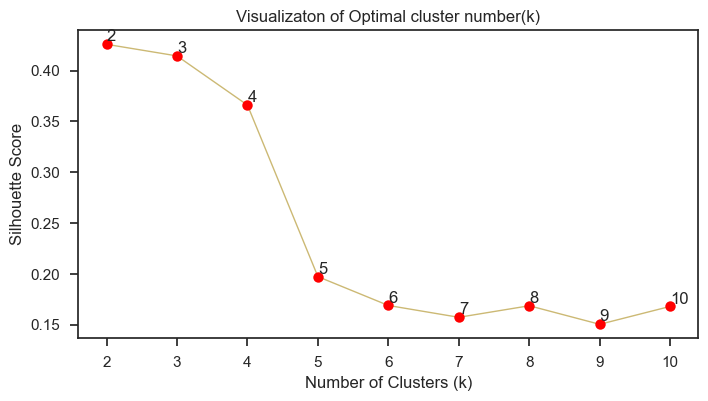

In [34]:
#PLOTTING OPTIMAL CLUSTER NUMBERS
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=50)
    kmeans.fit_predict(brand_analysis)
    labels = kmeans.labels_
    score = silhouette_score(brand_analysis, labels,random_state=50)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8,4))
plt.plot(k_values, silhouette_scores, 'y.-',markersize=15,linewidth=1,markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Visualizaton of Optimal cluster number(k)')
for i, k in enumerate(k_values):
    plt.text(k, silhouette_scores[i], str(k), ha='left', va='bottom')
plt.show()

{'2 Clusters': 0.4224372145891049, '3 Clusters': 0.4145090057933197, '4 Clusters': 0.3542292381746056, '5 Clusters': 0.19372718306631692, '6 Clusters': 0.18939571025444393, '7 Clusters': 0.17811195693112705, '8 Clusters': 0.06533689848957723, '9 Clusters': 0.0558476607625257, '10 Clusters': 0.05133159104446308}


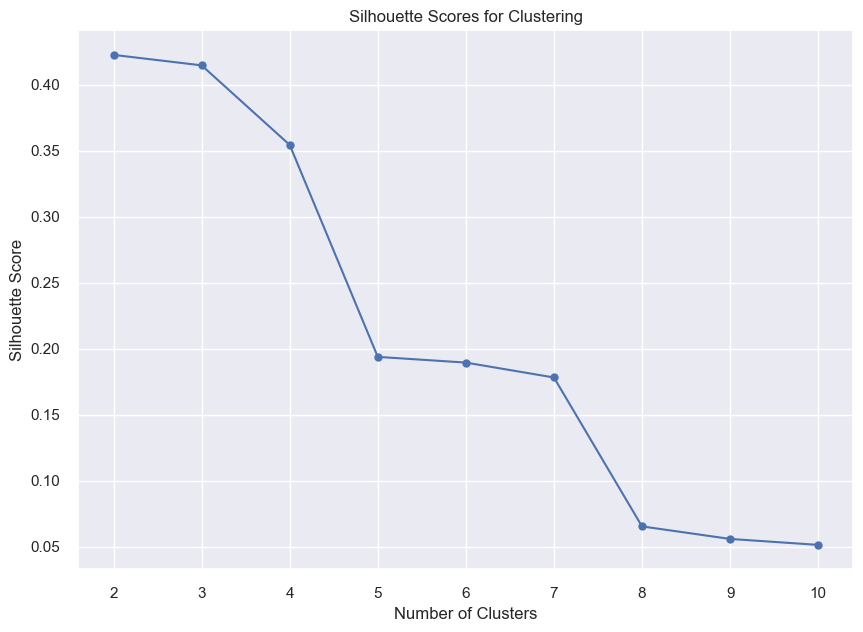

In [36]:
k_values = range(2, 11)
silhouette_scores = []
cluster_mapping = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(brand_analysis)
    labels = kmeans.labels_

    silhouette_avg = silhouette_score(brand_analysis, labels)
    silhouette_scores.append(silhouette_avg)

    cluster_mapping[f'{k} Clusters'] = silhouette_avg

print(cluster_mapping)

sns.set_theme()
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Clustering')
plt.show()

In [ ]:
AS Silhouette score for K=2 is high we will select 2 as our K value

In [38]:
model = KMeans(n_clusters=2,random_state=50)
model.fit(brand_analysis)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=50)

In [45]:
cluster_analysis = brand_analysis.copy(deep=True)
cluster_analysis['cluster'] =model.labels_ 
cluster_analysis.sample(5)

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
12215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24729,0,2,1,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10422,0,0,0,0,0,0,0,0,2,0,...,0,0,0,1,1,0,0,0,0,1


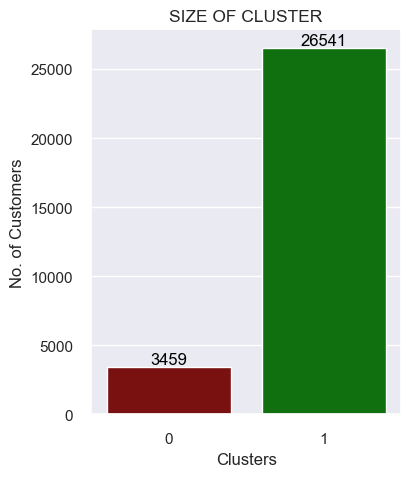

In [46]:
plt.figure(figsize=(4,5))
sns.countplot(data= cluster_analysis, x = 'cluster', palette=['darkred',"green"])
plt.title('SIZE OF CLUSTER', fontsize = 12.5)
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')
cluster=cluster_analysis.cluster.value_counts().sort_index(ascending=True)
for i, count in enumerate(cluster):
    plt.text(i, count, str(count), va='bottom',ha='center', color='black')

In [48]:
cluster_analysis.rename(columns={'cluster': 'Brand'},inplace=True) 
#grouping the data
analyse_brands=cluster_analysis.groupby('Brand').sum().T 
#sorting the brands 0
brand_sort_0=analyse_brands.iloc[:,0:1].sort_values(0,ascending=False).head(10)
brand_sort_1=analyse_brands.iloc[:,1:].sort_values(1,ascending=False).head(10)

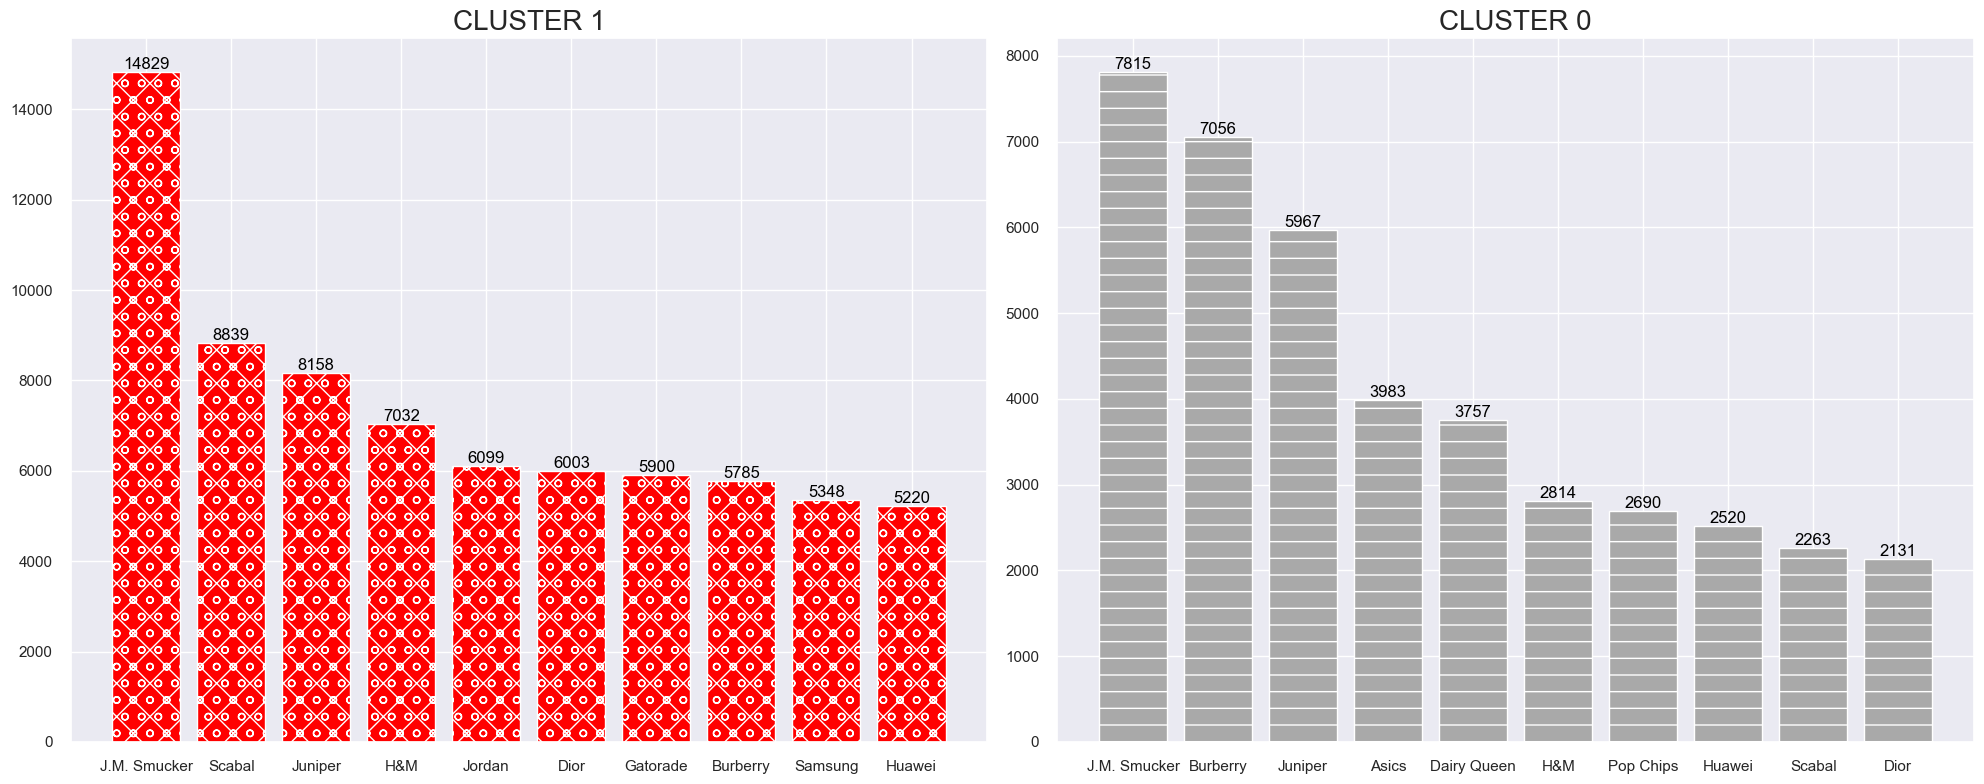

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

axes[0].bar(brand_sort_1.index, brand_sort_1.values.flatten(), color='red',hatch='ox')  #cluster 1
axes[0].set_title('CLUSTER 1',fontsize=20)
for i, count in enumerate(brand_sort_1.values.flatten()):
    axes[0].text(i, count, str(count), va='bottom', ha='center', color='black')

axes[1].bar(brand_sort_0.index, brand_sort_0.values.flatten(), color='darkgrey',hatch='-')   #cluster 0
axes[1].set_title('CLUSTER 0',fontsize=20)
for i, count in enumerate(brand_sort_0.values.flatten()):
    axes[1].text(i, count, str(count), va='bottom', ha='center', color='black')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
CLUSTER 1 REPORT
We can use cluster 1 for brand search analysis which hold highest brand searches around 26541 customers

MOST AND LEAST SEARCHED BRAND BY CUSTOMER
Most frequent searched brand by customer is J.M. Smucker 


HERE I LISTED SOME OF THE BRANDS HOLD THE TOP CUSTOMER BASE
TYPE OF INDUSTRY	BRANDS
Food and Drink	*J.M. Smucker* , *Gatorade*
Fashion brands	*Scabal, H&M, Dior, Burberry*
Technology and Networking	*Juniper*
Mobile brands	*Samsung* and *Huawei*
Sports brands	*Jordan*
CLUSTER 1 - BRANDS MOSTLY ENGAGED BY CUSTOMERS WHILE BRAND SEARCHING AND AN INFLUENCE OF PREVILAGE TO MODERATE CUSTOMER FOR PLACING ORDERS

OVERALL CONCLUSION FOR CLUSTER 1 IS CUSTOMER LIKELY TO SEARCH FOOD , CLOTHING , MOBILES AND SPORTWEARS BRANDS


In [ ]:
CLUSTER 0 REPORT
We can see that cluster 0 hold low-set brand searches around 3459 customers

CLUSTER 0 - INEXPENSIVE BRANDS AND THIS LEADS TO LESS INFULENCE OF PREVILAGE CUSTOMER WHILE SEARCHING OF BRANDS

BY ADDING FESTIVE OFFERS AND REASONABLE DISCOUNTS IT LEADS TO FASCINATE ABOUT THE BRANDS WHILE CUSTOMERS SEARCHING FOR A PRODUCTS
OVERALL CONCLUSION FOR CLUSTER 0 IS IT WILL ATTRACT LESS NUMBER OF CUSTOMERS


In [ ]:
CONCLUSION:

In E-commerce customer segmentation the k-Means clustering plays major role for identifying the purchase pattern based on customer interest ,Here I used silhoutte score for finding an optimal cluster number to predict the right n_cluster.


After that splitting cluster into cluster 1 is previlge to moderate customer and cluster 0 is low-set of interest in purchasing